<a href="https://colab.research.google.com/github/tesla-self/DATASET/blob/master/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!git clone https://github.com/tesla-self/DATASET

In [4]:
!ls DATASET

driving_log.csv  IMG


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D,MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import random
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

In [49]:
datadir = 'DATASET'
columns = ['center','left','right','steering','throttle','reverse','speed']
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'),names = columns)
pd.set_option('display.max_colwidth',-1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,E:\jainil\data\IMG\center_2020_02_25_20_15_08_328.jpg,E:\jainil\data\IMG\left_2020_02_25_20_15_08_328.jpg,E:\jainil\data\IMG\right_2020_02_25_20_15_08_328.jpg,0.0,0.0,0.0,0.000081
1,E:\jainil\data\IMG\center_2020_02_25_20_15_08_430.jpg,E:\jainil\data\IMG\left_2020_02_25_20_15_08_430.jpg,E:\jainil\data\IMG\right_2020_02_25_20_15_08_430.jpg,0.0,0.0,0.0,0.000081
2,E:\jainil\data\IMG\center_2020_02_25_20_15_08_534.jpg,E:\jainil\data\IMG\left_2020_02_25_20_15_08_534.jpg,E:\jainil\data\IMG\right_2020_02_25_20_15_08_534.jpg,0.0,0.0,0.0,0.000081
3,E:\jainil\data\IMG\center_2020_02_25_20_15_08_644.jpg,E:\jainil\data\IMG\left_2020_02_25_20_15_08_644.jpg,E:\jainil\data\IMG\right_2020_02_25_20_15_08_644.jpg,0.0,0.0,0.0,0.000081
4,E:\jainil\data\IMG\center_2020_02_25_20_15_08_745.jpg,E:\jainil\data\IMG\left_2020_02_25_20_15_08_745.jpg,E:\jainil\data\IMG\right_2020_02_25_20_15_08_745.jpg,0.0,0.0,0.0,0.000081


In [50]:
def path_leaf(path):
  head,tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()


,center,left,right,steering,throttle,reverse,speed
0,center_2020_02_25_20_15_08_328.jpg,left_2020_02_25_20_15_08_328.jpg,right_2020_02_25_20_15_08_328.jpg,0.0,0.0,0.0,0.000081
1,center_2020_02_25_20_15_08_430.jpg,left_2020_02_25_20_15_08_430.jpg,right_2020_02_25_20_15_08_430.jpg,0.0,0.0,0.0,0.000081
2,center_2020_02_25_20_15_08_534.jpg,left_2020_02_25_20_15_08_534.jpg,right_2020_02_25_20_15_08_534.jpg,0.0,0.0,0.0,0.000081
3,center_2020_02_25_20_15_08_644.jpg,left_2020_02_25_20_15_08_644.jpg,right_2020_02_25_20_15_08_644.jpg,0.0,0.0,0.0,0.000081
4,center_2020_02_25_20_15_08_745.jpg,left_2020_02_25_20_15_08_745.jpg,right_2020_02_25_20_15_08_745.jpg,0.0,0.0,0.0,0.000081


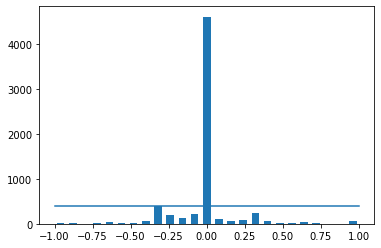

In [51]:
num_bins = 25
sample_per_bin = 400
hist, bins = np.histogram(data['steering'],num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (sample_per_bin,sample_per_bin))


total data: 6445
remove 4203
remaing: 2242


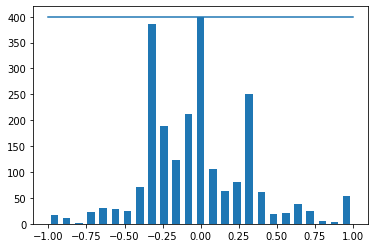

In [52]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[sample_per_bin:]
  remove_list.extend(list_)
print('remove',len(remove_list))
data.drop(data.index[remove_list],inplace=True)
print('remaing:',len(data))

hist, _ =np.histogram(data['steering'],(num_bins))
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(sample_per_bin,sample_per_bin))

In [55]:
print(data.iloc[1])
def load_img_steering(datadir,df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0],indexed_data[1],indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings
image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2020_02_25_20_15_10_603.jpg
left        left_2020_02_25_20_15_10_603.jpg  
right       right_2020_02_25_20_15_10_603.jpg 
steering   -0.145802                          
throttle    1                                 
reverse     0                                 
speed       7.26671                           
Name: 21, dtype: object


In [56]:
x_train, x_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print("Training sample:{}\n valid sample:{}".format(len(x_train), len(x_valid)))

Training sample:1793
 valid sample:449


Text(0.5, 1.0, 'validating set')

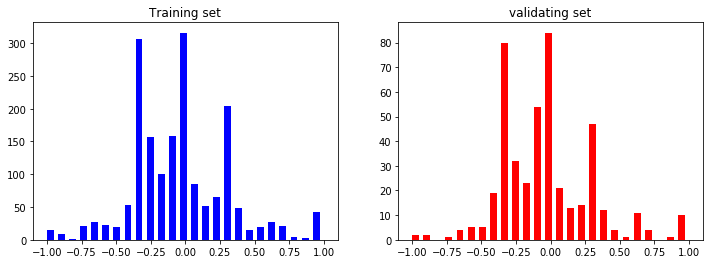

In [58]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train,bins=num_bins,width=0.05,color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid,bins=num_bins,width=0.05,color='red')
axes[1].set_title('validating set')

In [0]:
def img_preprocess(img):
  img = mpimg.imread(img)
  img = img[60:135,:,:]
  img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3,3),0)
  img = cv2.resize(img,(200,66))
  img = img/255
  return img

Text(0.5, 1, 'preprocessed')

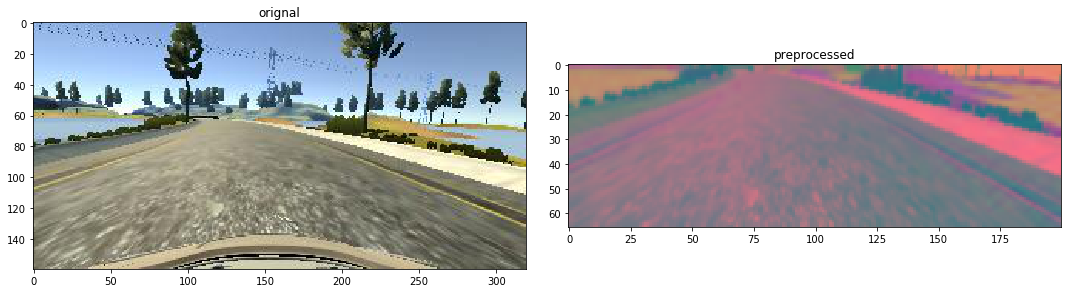

In [81]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)

fig, axs = plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('orignal')
axs[1].imshow(preprocessed_image)
axs[1].set_title('preprocessed')


In [84]:
x_train = np.array(list(map(img_preprocess, x_train)))
x_valid = np.array(list(map(img_preprocess, x_valid)))

TypeError: ignored